# Regressão 01 - tarefa 01

### 1. Explorando a base de gorjetas

a. Na aula fizemos uma regressão de ```tip``` explicada por ```net_bill```. Carregue os pacotes e a base, crie as variáveis necessárias como na aula, e reproduza esta regressão.

b. Reproduza também o gráfico de dispersão dessas duas variáveis.

In [6]:
import pandas as pd
import seaborn as sns
from seaborn import load_dataset
import statsmodels.api as sm

import matplotlib.pyplot as plt

import numpy as np

import statsmodels.formula.api as smf

In [2]:
tips = sns.load_dataset("tips")
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


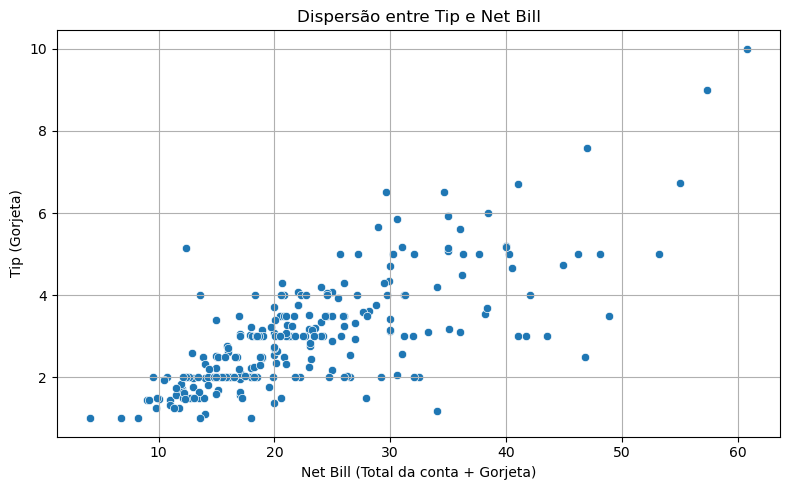

In [4]:
df = sns.load_dataset('tips')

df['net_bill'] = df['total_bill'] + df['tip']

plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='net_bill', y='tip')
plt.title('Dispersão entre Tip e Net Bill')
plt.xlabel('Net Bill (Total da conta + Gorjeta)')
plt.ylabel('Tip (Gorjeta)')
plt.grid(True)
plt.tight_layout()
plt.show()

### 2. Mudança de perspectiva

Agora ajuste um modelo de regressão de ```tip_pct``` por ```net_bill```. Construa o gráfico de dispersão correspondente.

                            OLS Regression Results                            
Dep. Variable:                tip_pct   R-squared:                       0.066
Model:                            OLS   Adj. R-squared:                  0.062
Method:                 Least Squares   F-statistic:                     17.10
Date:                Thu, 19 Jun 2025   Prob (F-statistic):           4.89e-05
Time:                        20:45:16   Log-Likelihood:                 344.76
No. Observations:                 244   AIC:                            -685.5
Df Residuals:                     242   BIC:                            -678.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1969      0.010     20.676      0.0

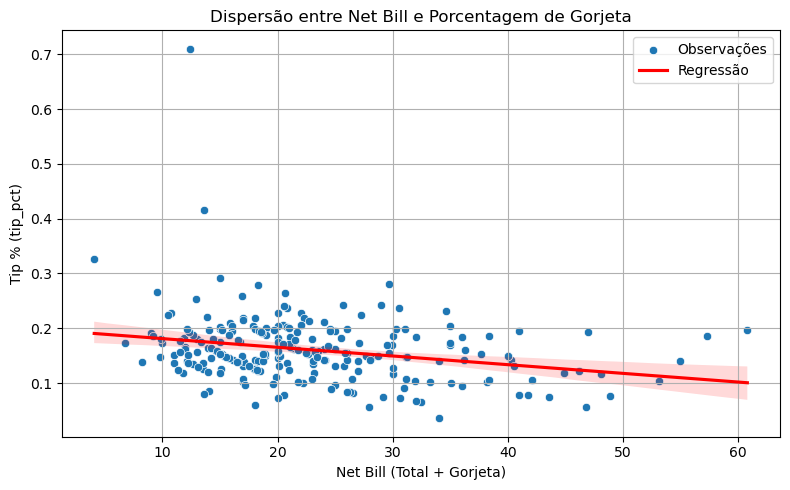

In [7]:
df['net_bill'] = df['total_bill'] + df['tip']
df['tip_pct'] = df['tip'] / df['total_bill']

X = sm.add_constant(df['net_bill'])  
modelo = sm.OLS(df['tip_pct'], X).fit()

print(modelo.summary())

plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='net_bill', y='tip_pct', label='Observações')
sns.regplot(data=df, x='net_bill', y='tip_pct', scatter=False, color='red', label='Regressão')
plt.title('Dispersão entre Net Bill e Porcentagem de Gorjeta')
plt.xlabel('Net Bill (Total + Gorjeta)')
plt.ylabel('Tip % (tip_pct)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### 3. Comente

Compare os dois gráficos e comente (de forma objetiva e suscinta) a relação entre eles e a diferença do ajuste. Podemos comparar diretamente os $R^2$s?

In [ ]:
tip ~ net_bill: relação positiva → contas maiores, gorjetas maiores.

tip_pct ~ net_bill: relação negativa → contas maiores, gorjetas proporcionalmente menores.

A escolha da variável resposta muda completamente a perspectiva da análise. Não pode ser comparado diretamente.

### 4. Ajuste do modelo em outra escala

Com o modelo no item 3, obtenha a preditiva do valor da gorjeta:
  1. obtenha o valor predito ```pred``` para ```tip_pct``` (dica, veja o atributo ```reg.fittedvalues```)
  2. obtenha o valor predito para ```tip``` como ```tip_pct * net_bill```
  3. calcule o $R^2$ do modelo para ```tip```
  4. compare esse $R^2$ com o do item 1

In [8]:
pred_tip_pct = modelo.fittedvalues

pred_tip = pred_tip_pct * df['net_bill']

from sklearn.metrics import r2_score
r2_transformado = r2_score(df['tip'], pred_tip)

X_tip = sm.add_constant(df['net_bill'])
modelo_direto = sm.OLS(df['tip'], X_tip).fit()
r2_direto = modelo_direto.rsquared

print(f'R² (modelo com transformação via tip_pct): {r2_transformado:.4f}')
print(f'R² (modelo direto tip ~ net_bill): {r2_direto:.4f}')


R² (modelo com transformação via tip_pct): 0.3883
R² (modelo direto tip ~ net_bill): 0.5597
